In [132]:
#import data
#We have files with news labelled from Polish Stoxc Market, twitter and news headlines. We can notice that
#in files with tweets and news headlines we have issue with separator and text encoding
import pandas as pd
news_df=pd.read_csv('/home/slisowski/Portfolio/wig20_sentiment/wig20_news_toexcel.csv')


In [133]:
#Lets inspect some data
news_df

,company,news_date,news_text,Unnamed: 3,Unnamed: 4
0,ASSECO-POLAND,2022-06-02 11:10:24,"Haitong Bank, w raporcie z 31 maja , obniżył r...",1,NaN
1,ASSECO-POLAND,2022-05-26 12:08:45,"ComCERT, polska spółka z grupy kapitałowej Ass...",3,NaN
2,ASSECO-POLAND,2022-05-26 10:13:35,W I kwartale 2022 roku ACP (ASSECOPOL) osiągnę...,3,NaN
3,ASSECO-POLAND,2022-05-25 19:33:15,Zysk netto grupy Asseco Poland w pierwszym kwa...,3,NaN
4,ASSECO-POLAND,2022-05-25 17:48:10,Portfel zamówień grupy Asseco Poland na 2022 r...,3,NaN
...,...,...,...,...,...
10772,SPL,2016-03-16 15:39:52,Bank Zachodni WBK otrzymał pożyczkę w wysokośc...,NaN,NaN
10773,SPL,2016-02-02 11:05:37,Zdaniem analityków z departamentu analiz Domu ...,NaN,NaN
10774,SPL,2016-01-27 17:46:11,Bank Zachodni WBK opublikował wybrane dane fin...,NaN,NaN
10775,SPL,2016-01-18 00:05:10,Coroczna publikacja składu portfeli otwartych ...,NaN,NaN


In [134]:
#remove column Unnamed:  4 and rename column Unnamed: 3 to sentiment
news_df=news_df.drop('Unnamed: 4', axis=1)

In [135]:
# remove not labelled news
news_df=news_df.rename(columns={'Unnamed: 3':'sentiment'})
news_df=news_df[news_df['sentiment'].notnull()]

In [136]:
#we should leave news only with label 1 2 or 3
news_df=news_df[news_df['sentiment'].isin([str(1),str(2),str(3)])]

In [137]:
#cast sentiment as integer
news_df['sentiment']=news_df['sentiment'].astype('int')

In [138]:
#possible values in sentiment
news_df['sentiment'].value_counts()

3    2815
2    2595
1    1564
Name: sentiment, dtype: int64

In [139]:
#Our data is imbalanced so first add some news with negative sentiment from another dataset with news headlines
news_head_df=pd.read_csv("/home/slisowski/Pobrane/stock_news_sentiment/all-data.csv", encoding="Windows-1252", names=["sentiment","text"])

In [140]:
news_head_df=news_head_df[news_head_df['sentiment']=='negative']

In [141]:
tweets_df=pd.read_csv("/home/slisowski/Pobrane/tweets_labelled.csv", sep=";")

In [142]:
tweets_df=tweets_df[tweets_df['sentiment']=='negative']

In [143]:
tweets_df

,id,created_at,text,sentiment
1,661634,2020-06-25 06:20:06+00:00,#SriLanka surcharge on fuel removed!\n⛽📉\nThe ...,negative
7,392845,2020-06-02 01:12:29+00:00,RT @ArjunKharpal: #Apple has cut the prices of...,negative
8,313771,2020-05-07 04:58:41+00:00,RT @SMA_alpha: The #CDC U.S. New Case data has...,negative
11,417260,2020-06-04 07:29:51+00:00,Guys if market stays below 10000 till 2 expect...,negative
13,516487,2020-06-14 18:33:57+00:00,Interesting comparison to 2007-09 market of $S...,negative
...,...,...,...,...
1274,143163,2020-04-21 15:28:13+00:00,RT @jmllubber: @kerberos007 They also bought $...,negative
1275,585451,2020-06-19 13:48:18+00:00,DA Davidson Downgrades First Bancorp $FBNC to ...,negative
1279,131219,2020-04-20 13:51:57+00:00,"RT @realstock100: #SHI. Double bottom in, at a...",negative
1284,751812,2020-07-02 14:53:37+00:00,When we see leaders \n\n$MSFT $AMZN keep hitti...,negative


In [144]:
news_head_df['sentiment']=news_head_df['sentiment'].map({'negative':1})

In [145]:
tweets_df['sentiment']=tweets_df['sentiment'].map({'negative':1})

In [146]:
news_head_df=news_head_df[['text','sentiment']]
tweets_df=tweets_df[['text','sentiment']]

In [147]:
news_df=news_df.rename(columns={'news_text':'text'})


In [148]:
#translate news to English
#from tqdm import tqdm
#import translators as ts
#translated_news=[]
#for i in tqdm(range(len(news_df))):
    #translation=ts.google(str(news_df['news_text'].iloc[i]))
    #translated_tup=(news_df['company'].iloc[i],news_df['news_date'].iloc[i], translation, news_df['sentiment'].iloc[i])
    #translated_news.append(translated_tup)
    
    #if(i%300==0)&(i!=0):
        #translated_df=pd.DataFrame(translated_news, columns=['company','news_date','news_text','sentiment'])
        #translated_df.to_csv('/home/slisowski/Portfolio/wig20_sentiment/translated_files_prod/news_tr_'+str(news_df.index[i]))
        #translated_news=[]
    #elif(i==len(news_df)-1):
        #translated_df=pd.DataFrame(translated_tup, columns=['company','news_date','news_text','sentiment'])
        #translated_df.to_csv('/home/slisowski/Portfolio/wig20_sentiment/translated_files_prod/news_tr_'+str(news_df.index[i]))
        #break

In [149]:
#During translating news we were saving data to csv files in chunk, now we have to concatenate al csv files
from os import path
from os import listdir
from operator import itemgetter
all_files=listdir('/home/slisowski/Portfolio/wig20_sentiment/translated_files_prod_wig20/')

#We have to sort files by index number, but this is string so first we need to extract index as integer
file_idx=[]
for file in all_files:
    idx=file.split('_')[2]
    file_idx.append(int(idx))
file_idx

files_idx=zip(all_files, file_idx)
sorted_tuples=sorted(tuple(files_idx),key=itemgetter(1))
sorted_list_files=[]
for tup in sorted_tuples:
    dir_path='/home/slisowski/Portfolio/wig20_sentiment/translated_files_prod_wig20/'
    file_path=dir_path+tup[0]
    sorted_list_files.append(file_path)
    

    
#news_df_en=pd.concat(map(pd.read_csv, sorted_list_files), ignore_index=True)

In [150]:
news_df_en=pd.read_csv('/home/slisowski/Portfolio/wig20_sentiment/news_to_model_wig20_compare.csv')

In [151]:
all_files

['news_tr_3621',
 'news_tr_4521',
 'news_tr_1817',
 'news_tr_2717',
 'news_tr_3320',
 'news_tr_5421',
 'news_tr_613',
 'news_tr_4221',
 'news_tr_2117',
 'news_tr_5121',
 'news_tr_2417',
 'news_tr_1516',
 'news_tr_306',
 'news_tr_4821',
 'news_tr_1216',
 'news_tr_3017',
 'news_tr_6973',
 'news_tr_914',
 'news_tr_6925',
 'news_tr_6024',
 'news_tr_6324',
 'news_tr_3921',
 'news_tr_5723',
 'news_tr_6625']

In [152]:
#Now after translation Polish text concatenate all df's to one. first let's inspext data
news_df_en.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6974 entries, 0 to 6973
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0.1       6974 non-null   int64 
 1   Unnamed: 0         6974 non-null   int64 
 2   company            6974 non-null   object
 3   news_date          6974 non-null   object
 4   news_text          6974 non-null   object
 5   sentiment          6974 non-null   int64 
 6   money              6974 non-null   object
 7   amount             6974 non-null   object
 8   compare            6974 non-null   object
 9   compare_text       6974 non-null   object
 10  news_text_compare  6974 non-null   object
dtypes: int64(3), object(8)
memory usage: 599.5+ KB


In [153]:
news_df_en=news_df_en.rename(columns={'news_text':'text'})

In [154]:
news_df_en.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6974 entries, 0 to 6973
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0.1       6974 non-null   int64 
 1   Unnamed: 0         6974 non-null   int64 
 2   company            6974 non-null   object
 3   news_date          6974 non-null   object
 4   text               6974 non-null   object
 5   sentiment          6974 non-null   int64 
 6   money              6974 non-null   object
 7   amount             6974 non-null   object
 8   compare            6974 non-null   object
 9   compare_text       6974 non-null   object
 10  news_text_compare  6974 non-null   object
dtypes: int64(3), object(8)
memory usage: 599.5+ KB


In [155]:
#In tweets_df and news_df_en we leave only text and sentiment column
news_df_en=news_df_en[['text','sentiment']]
news_df_en=pd.concat([news_df_en, tweets_df, news_head_df])

In [156]:
news_df_en

,text,sentiment
0,"Haitong Bank, in a report of May 31, reduced t...",1
1,"Comcert, a Polish company from the Asseco Pola...",3
2,"In the first quarter of 2022, ACP (Assecopol) ...",3
3,The net profit of the Asseco Poland group in t...,3
4,The Portfolio of the Asseco Poland Group for 2...,3
...,...,...
4840,HELSINKI Thomson Financial - Shares in Cargote...,1
4841,LONDON MarketWatch -- Share prices ended lower...,1
4843,Operating profit fell to EUR 35.4 mn from EUR ...,1
4844,Net sales of the Paper segment decreased to EU...,1


In [157]:
#We have translated df with news so now let's find out some statistics aspects
from nltk.tokenize import word_tokenize
count_words=[len(word_tokenize(news)) for news in news_df_en['text']]

<AxesSubplot:>

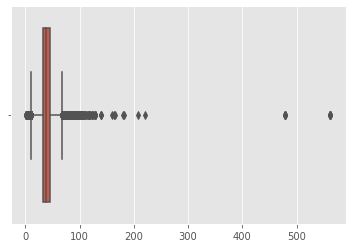

In [158]:
import seaborn as sns
sns.boxplot(x=count_words)

<AxesSubplot:ylabel='Count'>

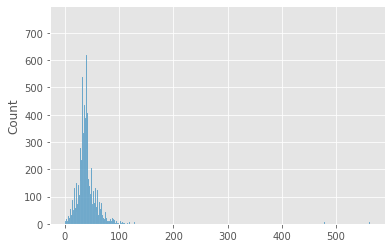

In [159]:
sns.histplot(x=count_words)

In [160]:
#In dataset we have few news that are much longer, so we decide to cut news that are 3 times standard deviation
#longer than mean

news_df_en['news_tokens']=news_df_en['text'].apply(lambda x: word_tokenize(x))

In [161]:
import numpy as np
mean_long=np.mean(count_words)
std_3_times=mean_long+(3*np.std(count_words))
std_3_times=round(std_3_times,0)

In [162]:
std_3_times

121.0

In [163]:
news_df_en=news_df_en[news_df_en['news_tokens'].apply(lambda x: len(x))<=std_3_times]

In [164]:
#Check statistics again
count_word_clean=news_df_en['news_tokens'].apply(lambda x:len(x))

<AxesSubplot:xlabel='news_tokens'>

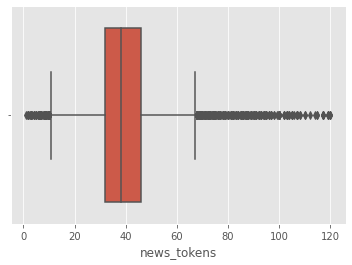

In [165]:
sns.boxplot(x=count_word_clean)

In [166]:
#now define cleaning function for news 
#!pip install pycontractions==1.0.1
#from pycontractions import Contractions
import unicodedata
from nltk.stem import WordNetLemmatizer
import re
import preprocessor as p
from bs4 import BeautifulSoup
import demoji
from nltk.tokenize import word_tokenize
import contractions
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.stem import PorterStemmer
lem = WordNetLemmatizer()
ste=PorterStemmer()
import spacy

def clean_news(text):
    
    #remove emoji
    text=demoji.replace(text,' ')
    # use tweeter preprocessor to clean news
    text=p.clean(text)
    #remove html tags
    soup = BeautifulSoup(text, 'html.parser')
    text = soup.get_text()
    text=contractions.fix(text)
    
    
    #remove accented characters
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    
    text=text.lower()
   
    #remove numbers
    text = re.sub("[^a-zA-Z]", " ", text)
    #tokenize text
    
    list_of_words=word_tokenize(text)
    text = ' '.join(list_of_words)
    
    nlp=spacy.load('en_core_web_sm')
    doc=nlp(text)
    text = ' '.join([token.lemma_ for token in doc])
    text=text.lower()
    
    
    return text

In [167]:
text = '''She'd like to know how I'd done that!
          She's going to the park and I don't think I'll be home for dinner.
          Theyre going to the zoo and she'll be home for dinner. I was on dinner'''
 
clean_news(text)

'she would like to know how i would done that she is going to the park and i do not think i will be home for dinner they are going to the zoo and she will be home for dinner i wa on dinner'

In [168]:
clean_news(news_df_en['text'].iloc[2222])

'on wednesday the main index of the warsaw stock exchange for the third time this week closed the session with increase the leader were company that have lost their value in recent week in wig jsw and mercator gained the most and in mwig polenergia according to analyst the domestic market is in a favorable time window and in the optimistic variant there is a chance to attack the october peak'

In [169]:
from tqdm import tqdm
tqdm.pandas(desc="Example Desc")
news_df_en['text']=news_df_en['text'].progress_apply(lambda x:clean_news(x))


Example Desc: 100%|████████████████████████| 7888/7888 [00:10<00:00, 772.45it/s]
/tmp/ipykernel_13597/3809122978.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_df_en['text']=news_df_en['text'].progress_apply(lambda x:clean_news(x))


In [170]:
news_df_en.to_csv('/home/slisowski/Portfolio/wig20_sentiment/news_clea_to_model_wig20.csv')

In [171]:
news_df_all=pd.read_csv('/home/slisowski/Portfolio/wig20_sentiment/news_clea_to_model_wig20.csv', index_col=0)

In [172]:
news_df_all.isna().sum()

text           1
sentiment      0
news_tokens    0
dtype: int64

In [173]:
news_df_all.dropna(inplace=True)

In [174]:
news_df_all.isna().sum()

text           0
sentiment      0
news_tokens    0
dtype: int64

In [175]:
news_df_all=news_df_all[['text','sentiment']]

In [176]:
#Now we can count occurencies of words
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
cv=CountVectorizer()
cv.fit(news_df_all['text'])
freq_terms_neg=cv.transform(news_df_all[news_df_all['sentiment']==1].text)
freq_terms_neu=cv.transform(news_df_all[news_df_all['sentiment']==2].text)
freq_terms_pos=cv.transform(news_df_all[news_df_all['sentiment']==3].text)
neg_arr=np.sum(freq_terms_neg, axis=0)
neu_arr=np.sum(freq_terms_neu, axis=0)
pos_arr=np.sum(freq_terms_pos, axis=0)
neg=np.squeeze(np.asarray(neg_arr))
neu=np.squeeze(np.asarray(neu_arr))
pos=np.squeeze(np.asarray(pos_arr))
terms_freq_df=pd.DataFrame([neg,neu,pos], columns=cv.get_feature_names_out()).transpose()
terms_freq_df=terms_freq_df.rename(columns={0:'negative',1:'neutral',2:'positive'})
terms_freq_df['total']=terms_freq_df['negative']+terms_freq_df['neutral']+terms_freq_df['positive']

In [177]:
terms_freq_df.sort_values(by='total', ascending=False).iloc[:60]

,negative,neutral,positive,total
the,7203,8441,9973,25617
of,3647,4788,4835,13270
in,2700,2767,3694,9161
to,1906,1918,2480,6304
and,1523,1703,2055,5281
company,812,938,1229,2979
for,770,1021,1162,2953
on,888,963,825,2676
pln,562,623,1357,2542
said,438,656,870,1964


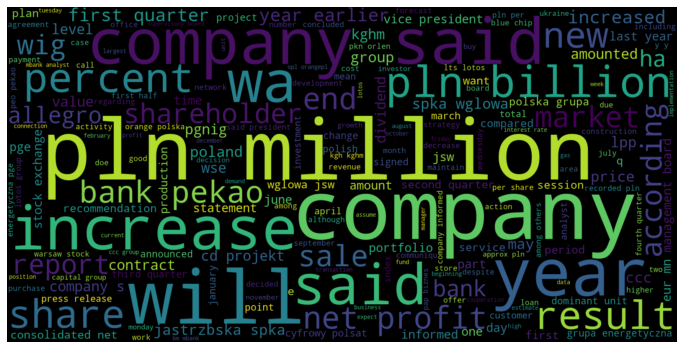

In [178]:
#Now we can use WordCloud to visualize words
import matplotlib.pyplot as plt
from wordcloud import WordCloud
news_wc=[]
plt.style.use('ggplot')
for n in news_df_all['text']:
    news_wc.append(n)

news_wc=pd.Series(news_wc).str.cat(sep=' ')

wordcloud=WordCloud(width=1600, height=800,max_font_size=200).generate(news_wc)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [179]:
#Before feed data to the model check if our dataset is balanced in terms of sentiment
news_df_all['sentiment'].value_counts()

3    2809
2    2579
1    2499
Name: sentiment, dtype: int64

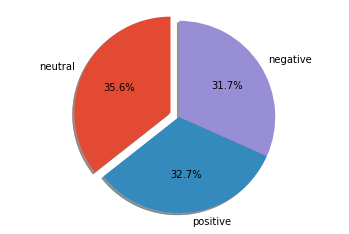

In [180]:
#Try visualize
values=news_df_all['sentiment'].value_counts().values
labels=['neutral','positive','negative']
explode=[0.1,0.0,0.0]
fig, ax1=plt.subplots()
ax1.pie(values, explode=explode, labels=labels, shadow=True, startangle=90, autopct='%1.1f%%')
ax1.axis('equal')
plt.show()

In [181]:
news_df_all['sentiment'].value_counts()

3    2809
2    2579
1    2499
Name: sentiment, dtype: int64

In [182]:
#remove stop words (most frequent words)
stop_words=terms_freq_df.sort_values(by='total', ascending=False).iloc[:10].index

In [183]:
stop_words

Index(['the', 'of', 'in', 'to', 'and', 'company', 'for', 'on', 'pln', 'said'], dtype='object')

In [184]:
news_df_all=news_df_all.drop_duplicates(subset='text')


In [185]:
news_df_all

,text,sentiment
0,haitong bank in a report of may reduced the re...,1
1,comcert a polish company from the asseco polan...,3
2,in the first quarter of acp assecopol achieved...,3
3,the net profit of the asseco poland group in t...,3
4,the portfolio of the asseco poland group for a...,3
...,...,...
4840,helsinki thomson financial share in cargotec f...,1
4841,london marketwatch share price ended lower in ...,1
4843,operating profit fell to eur mn from eur mn in...,1
4844,net sale of the paper segment decreased to eur...,1


In [186]:
#Save data
news_df_all.to_csv('/home/slisowski/Portfolio/wig20_sentiment/news_prepared_to_model_wig20.csv')